## 1. Import libraries and load the dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pmdarima as pmd
from statsmodels.tsa.statespace.dynamic_factor import DynamicFactor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [4]:
# Load the dataset
df = pd.read_csv("./USDT.csv")

df = df[['Price']]
df = df.dropna()
df = df.reset_index(drop=True)

df

,Price
0,1.0100
1,0.9959
2,0.9977
3,1.0000
4,1.0000
...,...
1942,1.0001
1943,0.9999
1944,1.0000
1945,1.0001


## 2. Split the data into training, test and validate sets

In [5]:
train_size = int(0.7 * len(df))
test_size = int(0.15 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Validate shape:", val_data.shape)

Train shape: (1362, 1)
Test shape: (292, 1)
Validate shape: (293, 1)


In [6]:
train_size = int(0.6 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Validate shape:", val_data.shape)

Train shape: (1168, 1)
Test shape: (389, 1)
Validate shape: (390, 1)


In [7]:
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Validate shape:", val_data.shape)

Train shape: (1362, 1)
Test shape: (389, 1)
Validate shape: (196, 1)


## 3. Perform Linear Regression Model 

### 3.1 Build and fit Linear Regression Model

In [8]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [9]:
def evaluate_lr_model(x_data, y_data):
    y_pred = model.predict(x_data)
    mse = mean_squared_error(y_data, y_pred)
    mae = mean_absolute_error(y_data, y_pred)
    mape = mean_absolute_percentage_error(y_data, y_pred)
    rmse = mean_squared_error(y_data, y_pred, squared=False)
    return y_pred, mse, mae, mape, rmse

### 3.2 Evaluate on Validate data

In [10]:
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred_test, test_mse, test_mae, test_mape, test_rmse = evaluate_lr_model(x_test, y_test)

### 3.3 Evaluate on Test data

In [11]:
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val, val_mse, val_mae, val_mape, val_rmse =  evaluate_lr_model(x_val, y_val)

### 3.4 Predict price for the next 30 days

In [12]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[1.00217809 1.00217957 1.00218104 1.00218251 1.00218399 1.00218546
 1.00218693 1.0021884  1.00218988 1.00219135 1.00219282 1.00219429
 1.00219577 1.00219724 1.00219871 1.00220018 1.00220166 1.00220313
 1.0022046  1.00220607 1.00220755 1.00220902 1.00221049 1.00221196
 1.00221344 1.00221491 1.00221638 1.00221785 1.00221933 1.0022208 ]


In [13]:
metrics = {
    'MSE': [val_mse, test_mse],
    'MAE': [val_mae, test_mae],
    'MAPE': [val_mape, test_mape],
    'RMSE': [val_rmse, test_rmse],
}

acc = pd.DataFrame(metrics, index=['Validate', 'Test'])

print(acc)

               MSE       MAE      MAPE      RMSE
Validate  0.000004  0.002007  0.002006  0.002086
Test      0.000003  0.001479  0.001479  0.001602


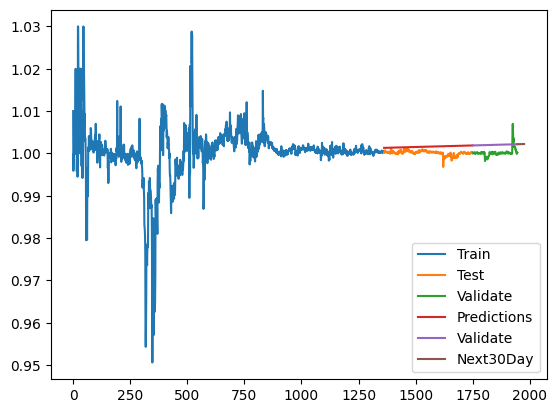

In [14]:
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index, val_data['Price'])
plt.plot(test_data.index, y_pred_test)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Validate', 'Predictions','Validate','Next30Day'])
plt.show()